* [Denver crime map](url=https://crime.denverpost.com/map/)
* [Crime rate after legalization of weed in Colorado](url=https://blog.naver.com/prado12/221496593627)
![Colorado](https://postfiles.pstatic.net/MjAxOTAzMjVfNTIg/MDAxNTUzNDcxNTk3MTg2.awxAcra7n2N6vfCVSHnSMusuRznablK1YnIhReY9ztUg.RAR3vJbnxkZ8_FHZmcH-ziNBIZTctn-RYvWjjxF1Xc0g.JPEG.prado12/f9e176541bae3e0fd7b843e63acef3fe.jpg?type=w966)

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt, font_manager as fm
matplotlib.rc('font', family='Malgun Gothic')

%matplotlib inline
import numpy as np
from tqdm import tqdm_notebook
import missingno as msno

In [2]:
offense = pd.read_csv('offense_codes.csv')
print(offense.shape)
offense.head()

(299, 8)


,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [3]:
crime = pd.read_csv('crime.csv')
print(crime.shape)
crime.head()

(526100, 19)


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [4]:
crime.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [5]:
offense.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'OFFENSE_TYPE_ID',
       'OFFENSE_TYPE_NAME', 'OFFENSE_CATEGORY_ID', 'OFFENSE_CATEGORY_NAME',
       'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [6]:
df = pd.merge(crime, offense)
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,...,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,201872599,201872599521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,NaN,1/30/2018 10:14:00 PM,12900 BLOCK E ANDREWS DR,...,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
2,201866465,201866465521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 1:30:00 PM,1/28/2018 1:30:00 PM,1/28/2018 4:26:00 PM,14000 BLK E MAXWELL PL,...,1714526.0,-104.824755,39.793246,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
3,201872704,201872704521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 11:08:00 PM,NaN,1/31/2018 8:43:00 AM,1700 BLOCK E BRUCE RANDOLPH AVE,...,1703764.0,-104.966880,39.764431,2,211,cole,1,0,Unlawful discharge of a weapon,All Other Crimes
4,2018255494,2018255494521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,4/17/2018 2:29:00 AM,NaN,4/17/2018 2:48:00 AM,900 BLOCK N NEWTON ST,...,1691766.0,-105.037222,39.731791,1,122,villa-park,1,0,Unlawful discharge of a weapon,All Other Crimes


In [7]:
df.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'OFFENSE_TYPE_NAME',
       'OFFENSE_CATEGORY_NAME'],
      dtype='object')

In [8]:
dff = df.copy()

In [9]:
dff = dff[['OFFENSE_ID',
        'FIRST_OCCURRENCE_DATE',
       'OFFENSE_TYPE_NAME',
       'OFFENSE_CATEGORY_NAME']]

In [10]:
dff.head()

,OFFENSE_ID,FIRST_OCCURRENCE_DATE,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978521300,6/15/2016 11:31:00 PM,Unlawful discharge of a weapon,All Other Crimes
1,201872599521300,1/30/2018 10:14:00 PM,Unlawful discharge of a weapon,All Other Crimes
2,201866465521300,1/28/2018 1:30:00 PM,Unlawful discharge of a weapon,All Other Crimes
3,201872704521300,1/30/2018 11:08:00 PM,Unlawful discharge of a weapon,All Other Crimes
4,2018255494521300,4/17/2018 2:29:00 AM,Unlawful discharge of a weapon,All Other Crimes


In [11]:
dff['FIRST_OCCURRENCE_DATE'] = tqdm_notebook(pd.to_datetime(dff['FIRST_OCCURRENCE_DATE']))

In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526100 entries, 0 to 526099
Data columns (total 4 columns):
OFFENSE_ID               526100 non-null int64
FIRST_OCCURRENCE_DATE    526100 non-null datetime64[ns]
OFFENSE_TYPE_NAME        526100 non-null object
OFFENSE_CATEGORY_NAME    526100 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 20.1+ MB


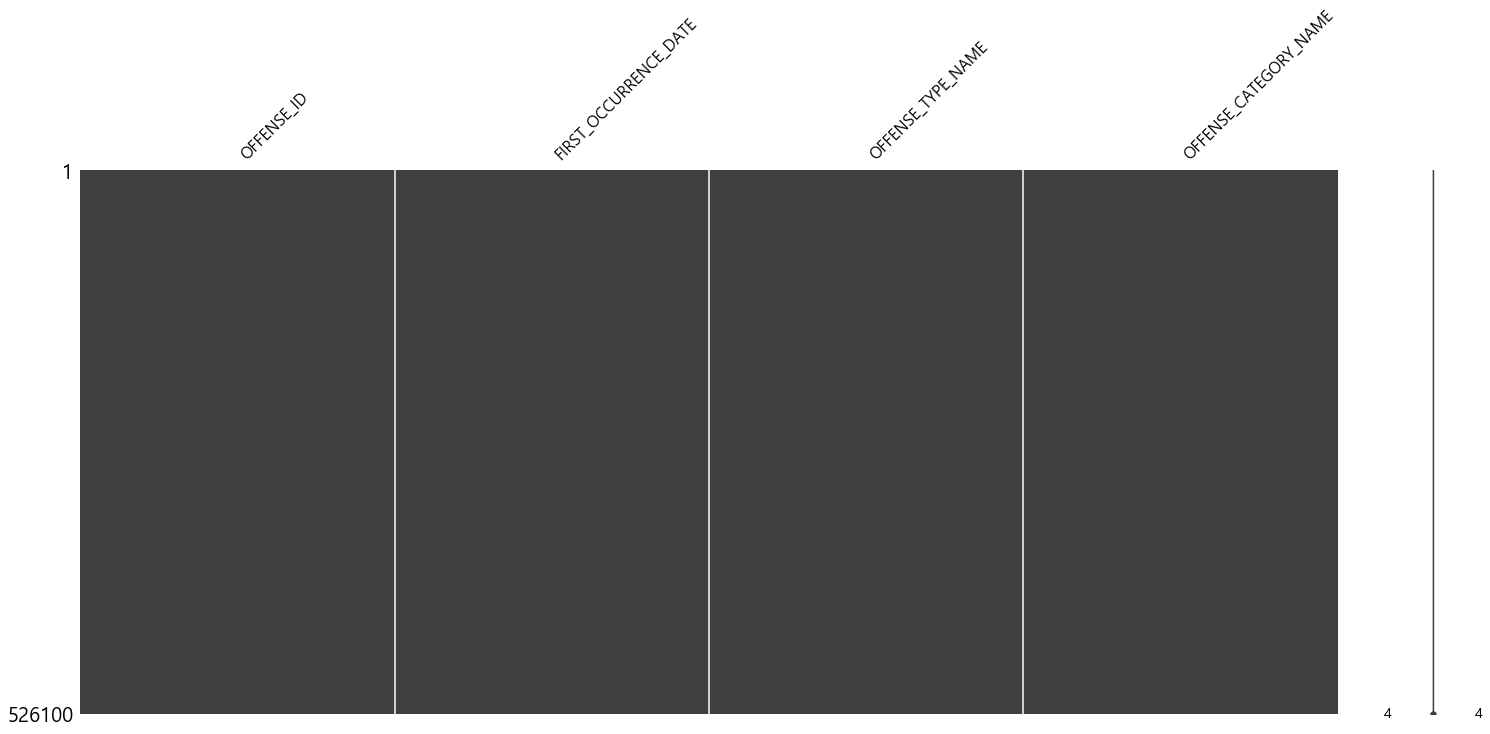

In [13]:
msno.matrix(dff)

In [14]:
crimekind = pd.DataFrame(dff['OFFENSE_CATEGORY_NAME'].value_counts()).reset_index()

In [15]:
crimekind.columns = ['Crime', 'Counts']

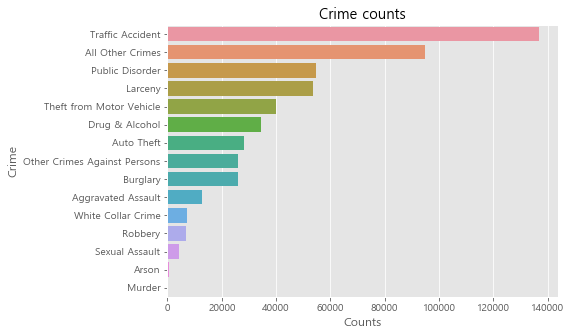

In [49]:
plt.style.use('ggplot')
plt.figure(figsize=(7,5))
plt.title('Crime counts')
sns.barplot(data=crimekind, x='Counts', y='Crime')

In [17]:
crimekindlist = list(crimekind['Crime'])
crimekindlist

['Traffic Accident',
 'All Other Crimes',
 'Public Disorder',
 'Larceny',
 'Theft from Motor Vehicle',
 'Drug & Alcohol',
 'Auto Theft',
 'Other Crimes Against Persons',
 'Burglary',
 'Aggravated Assault',
 'White Collar Crime',
 'Robbery',
 'Sexual Assault',
 'Arson',
 'Murder']

In [18]:
allother = dff.loc[dff['OFFENSE_CATEGORY_NAME']=='All Other Crimes','OFFENSE_TYPE_NAME']

In [19]:
allother = pd.DataFrame(allother.value_counts())

In [20]:
allother = allother.reset_index()

In [21]:
allother.columns=['Crime', 'Counts']

In [22]:
allother11 = allother.iloc[:11]

In [23]:
allother11

,Crime,Counts
0,Traffic offense - other,33668
1,Criminal trespassing,16483
2,Public order offense - other,8223
3,Habitual traffic offender,3993
4,Vehicular eluding - no chase,3968
5,Giving false information to police,3934
6,Violation of a restraining order,3287
7,Violation of a court order,2922
8,Unlawful discharge of a weapon,2864
9,Obstructing police,2075


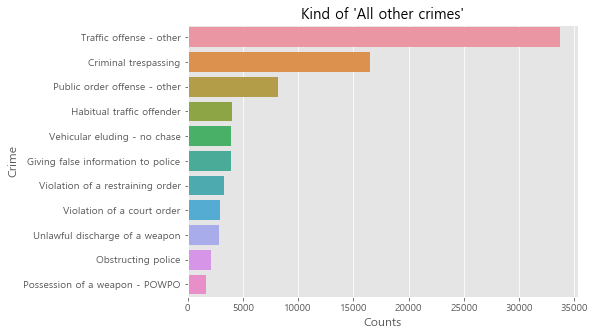

In [24]:
plt.figure(figsize=(7,5))
plt.title("Kind of 'All other crimes'")
sns.barplot(data= allother11, x='Counts', y='Crime')

In [25]:
PD = df.loc[df['OFFENSE_CATEGORY_NAME']=='Public Disorder']
PD = pd.DataFrame(PD['OFFENSE_TYPE_NAME'].value_counts()).reset_index()
PD.columns=['Crimes', 'Counts']

In [26]:
PD

,Crimes,Counts
0,Criminal mischief to a motor vehicle,15958
1,Criminal mischief - other,14114
2,Disturbing the peace,8928
3,Threatening to injure,5821
4,Criminal mischief - graffiti,3198
5,Curfew,1579
6,Public peace - other,1569
7,Harassment,1237
8,Engaging in prostitution,1000
9,Harassment - DV,527


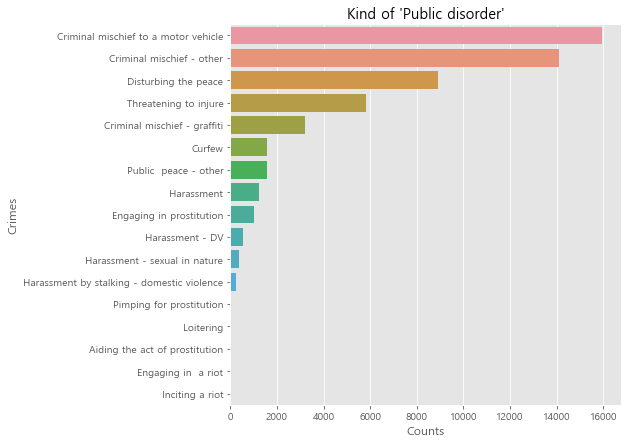

In [27]:
plt.figure(figsize=(7,7))
plt.title("Kind of 'Public disorder'")
sns.barplot(data=PD, x='Counts', y='Crimes')

In [28]:
list((df['OFFENSE_TYPE_ID'].value_counts()==1)[-7:].keys())

['riot-incite',
 'riot',
 'theft-from-yards',
 'money-laundering',
 'altering-vin-number',
 'theft-of-cable-services',
 'explosives-posses']

In [29]:
dff.sort_values(by='FIRST_OCCURRENCE_DATE')

,OFFENSE_ID,FIRST_OCCURRENCE_DATE,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
399392,20142204220200,2014-01-02 00:00:00,Burglary of a residence with forced entry,Burglary
502616,20145003027260400,2014-01-02 00:01:00,Identity theft,White Collar Crime
86149,20141945549900,2014-01-02 00:06:00,Traffic offense - other,All Other Crimes
302934,20141987131600,2014-01-02 00:30:00,Threatening to injure,Public Disorder
463883,20141987131302,2014-01-02 00:30:00,Assault causing minor bodily injury - domestic...,Other Crimes Against Persons
...,...,...,...,...
392406,2019704421739902,2019-11-05 02:17:00,Public order offense - other,All Other Crimes
2800,2019704450521300,2019-11-05 03:04:00,Unlawful discharge of a weapon,All Other Crimes
400373,2019704505220200,2019-11-05 04:00:00,Burglary of a residence with forced entry,Burglary
172680,2019704511357200,2019-11-05 04:45:00,Possession of methampetamine,Drug & Alcohol


In [30]:
def clearcrime(columns, year):
    data = pd.DataFrame(dff.loc[(dff['OFFENSE_CATEGORY_NAME']==columns)&(dff['FIRST_OCCURRENCE_DATE'].dt.year==year), 'OFFENSE_TYPE_NAME'].value_counts()).reset_index()
    data.columns=['crime', 'count']
    return data

In [31]:
dff['OFFENSE_CATEGORY_NAME'].value_counts()

Traffic Accident                136967
All Other Crimes                 94817
Public Disorder                  54585
Larceny                          53502
Theft from Motor Vehicle         40021
Drug & Alcohol                   34402
Auto Theft                       28050
Other Crimes Against Persons     25911
Burglary                         25890
Aggravated Assault               12561
White Collar Crime                7206
Robbery                           6835
Sexual Assault                    4376
Arson                              655
Murder                             322
Name: OFFENSE_CATEGORY_NAME, dtype: int64

In [32]:
drug2018 = clearcrime('Drug & Alcohol' ,2018)
drug2018.loc[drug2018['crime'].str.contains('osses'),'count'].sum()

4927

In [33]:
def clearcrime(columns, year):
    data = pd.DataFrame(dff.loc[(dff['OFFENSE_CATEGORY_NAME']==columns)&(dff['FIRST_OCCURRENCE_DATE'].dt.year==year), 'OFFENSE_TYPE_NAME'].value_counts()).reset_index()
    data.columns=['crime', 'count']
    return data

def possessplot(year):
    df = clearcrime('Drug & Alcohol', year)
    return df.loc[df['crime'].str.contains('osses'), 'count'].sum()

def sellingplot(year):
    df = clearcrime('Drug & Alcohol', year)
    return df.loc[df['crime'].str.contains('ellin'), 'count'].sum()

In [34]:
dfd = pd.DataFrame(
    index=['2014', '2015', '2016', '2017', '2018'],
    columns=['Possession of drug', 'Selling drug'])
dfd = dfd.fillna(0)
for i in range(5):
    dfd['Possession of drug'][i]=possessplot(i+2014)
    dfd['Selling drug'][i]=sellingplot(i+2014)
dfd

,Possession of drug,Selling drug
2014,5179,563
2015,5361,575
2016,5079,646
2017,4672,663
2018,4927,833


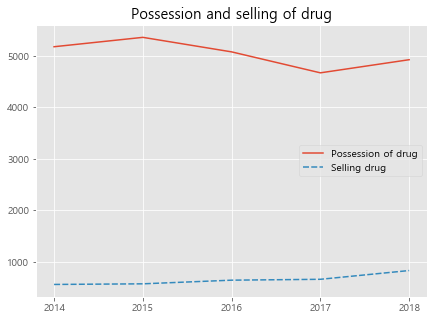

In [35]:
plt.figure(figsize=(7,5))
plt.title('Possession and selling of drug')
sns.lineplot(data=dfd)

* 콜로라도 주의 대마가 2014년 합법화 되면서 마약의 판매율이 상승하고 있다.

In [36]:
dff['YEAR'] = dff['FIRST_OCCURRENCE_DATE'].dt.year

In [37]:
dff['MONTH'] = dff['FIRST_OCCURRENCE_DATE'].dt.month

In [38]:
dff['HOUR'] = dff['FIRST_OCCURRENCE_DATE'].dt.hour

In [39]:
dff

,OFFENSE_ID,FIRST_OCCURRENCE_DATE,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME,YEAR,MONTH,HOUR
0,2016376978521300,2016-06-15 23:31:00,Unlawful discharge of a weapon,All Other Crimes,2016,6,23
1,201872599521300,2018-01-30 22:14:00,Unlawful discharge of a weapon,All Other Crimes,2018,1,22
2,201866465521300,2018-01-28 13:30:00,Unlawful discharge of a weapon,All Other Crimes,2018,1,13
3,201872704521300,2018-01-30 23:08:00,Unlawful discharge of a weapon,All Other Crimes,2018,1,23
4,2018255494521300,2018-04-17 02:29:00,Unlawful discharge of a weapon,All Other Crimes,2018,4,2
...,...,...,...,...,...,...,...
526095,2015461923091000,2015-08-13 16:54:00,Homicide by negligence,Murder,2015,8,16
526096,2015649351530300,2015-11-05 18:43:00,Engaging in a riot,Public Disorder,2015,11,18
526097,2018791389250301,2018-11-20 22:04:00,Altering a vehicle VIN number,White Collar Crime,2018,11,22
526098,20195003270090700,2019-08-15 23:42:00,Homicide of a Police Officer w/gun,Murder,2019,8,23


In [40]:
def moncrimecount(year):
    mon = pd.DataFrame(dff.loc[dff['YEAR']==year]['MONTH'].value_counts()).reset_index()
    mon.columns=['MONTH', 'COUNT']
    mon = mon.sort_values(by='MONTH')
    mon['YEAR'] = year
    return mon

In [41]:
mon14 = moncrimecount(2014)
mon15 = moncrimecount(2015)
mon16 = moncrimecount(2016)
mon17 = moncrimecount(2017)
mon18 = moncrimecount(2018)

In [42]:
moncrime = pd.merge(mon14, mon15, how='outer').merge(mon16, how='outer').merge(mon17, how='outer').merge(mon18, how='outer')

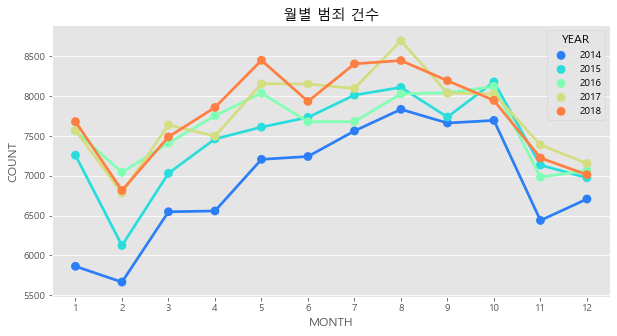

In [43]:
plt.figure(figsize=(10,5))
plt.title('월별 범죄 건수')
sns.pointplot(data=moncrime, x='MONTH', y='COUNT', hue='YEAR', palette = 'rainbow')

In [44]:
traffic = pd.DataFrame(dff.loc[dff['OFFENSE_CATEGORY_NAME'].str.contains('Traffic'),'HOUR'].value_counts())

In [45]:
traffic = traffic.reset_index()

In [46]:
traffic.columns=['HOUR', 'COUNT']

In [47]:
traffic

,HOUR,COUNT
0,17,11242
1,16,10932
2,15,10463
3,8,8619
4,14,8597
5,12,8583
6,13,8340
7,7,8045
8,18,7986
9,11,7578


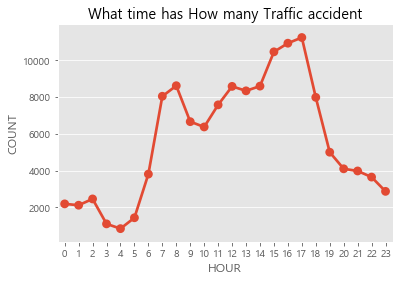

In [48]:
plt.title('What time has How many Traffic accident')
sns.pointplot(data=traffic, x='HOUR', y='COUNT')

1. 상대적으로 차가 적은 새벽시간에는 교통사고가 적다.
1. 상대적으로 차가 많은 출퇴근 시간대에 교통사고가 많다.